In [1]:
import timeit
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import glob
import time
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (3,3)
import os
import sys
import numba
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad

print(time.ctime())

Thu Sep 22 14:02:08 2022


In [2]:
def gauss(x, A, t0, sigma, d):
    y = abs(A)*np.exp(-(x-t0)**2/(2.*abs(sigma)**2)) + d
    return y

In [3]:
def v_err(A,D,sigma_A,sigma_D):
    return (A/D)*np.sqrt((sigma_A/A)**2 + (sigma_D/D)**2)

In [4]:

triplets_123_idler = np.load('idler_pairs123.npy')
triplets_124_idler = np.load('idler_pairs124.npy')

triplets_123_signal = np.load('signal_pairs123.npy')
triplets_124_signal = np.load('signal_pairs124.npy')


In [5]:
triplets_123_idler_dt12=np.subtract(triplets_123_idler[:,1],triplets_123_idler[:,0])
triplets_123_idler_dt13=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,0])
triplets_123_idler_dt23=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,1])


triplets_123_signal_dt12=np.subtract(triplets_123_signal[:,1],triplets_123_signal[:,0])
triplets_123_signal_dt13=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,0])
triplets_123_signal_dt23=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,1])

triplets_124_idler_dt12=np.subtract(triplets_124_idler[:,1],triplets_124_idler[:,0])
triplets_124_idler_dt14=np.subtract(triplets_124_idler[:,2],triplets_124_idler[:,0])
triplets_124_idler_dt24=np.subtract(triplets_124_idler[:,2],triplets_124_idler[:,1])

triplets_124_signal_dt12=np.subtract(triplets_124_signal[:,1],triplets_124_signal[:,0])
triplets_124_signal_dt14=np.subtract(triplets_124_signal[:,2],triplets_124_signal[:,0])
triplets_124_signal_dt24=np.subtract(triplets_124_signal[:,2],triplets_124_signal[:,1])


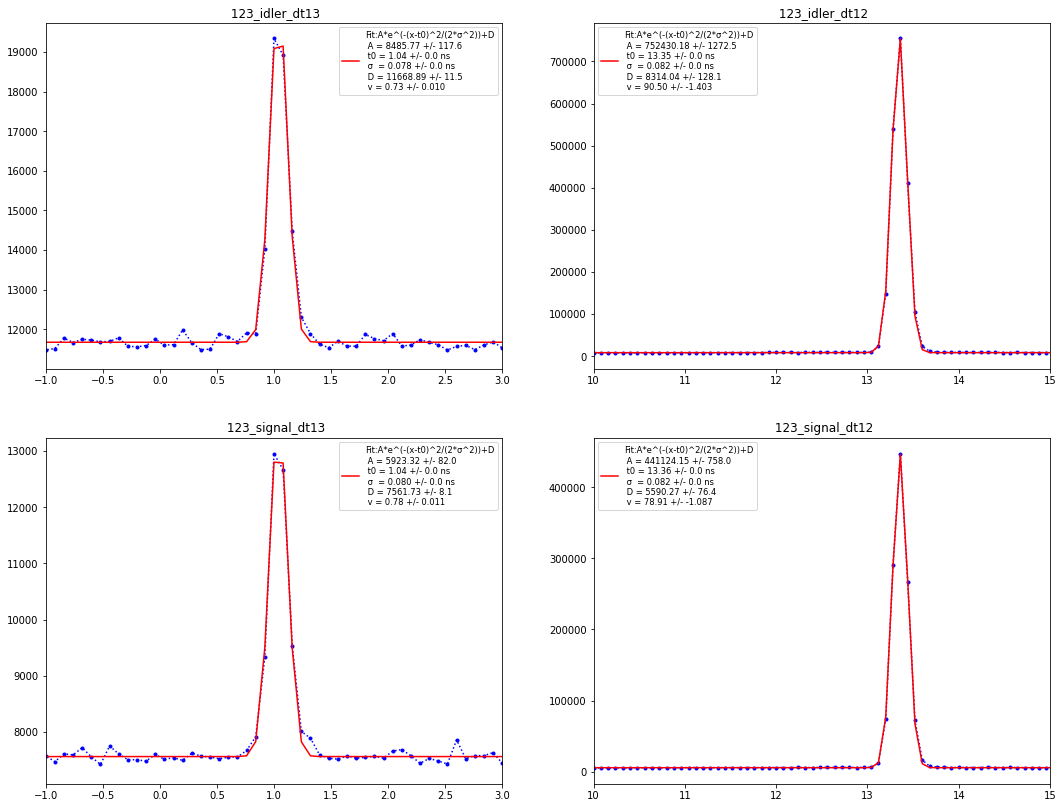

In [6]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (18,14))
w=80
nbins=125
x = np.linspace(8,18,nbins+1)
h12_from_triplets_idler=np.histogram(triplets_123_idler_dt12,bins=np.arange(8000, 18000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[0,1].set_title(' 123_idler_dt12')
best_vals, covar = curve_fit(gauss, x[:-1], h12_from_triplets_idler[0], p0 = [10000, 13, 0.08, 11000])
ax[0,1].plot(x[:-1], h12_from_triplets_idler[0], 'b.:')
ax[0,1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), abs(best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0,1].legend(fontsize = 'small',loc='best')
ax[0,1].set_xlim(10,15)
#ax.set_ylim(40000,60000)
globals()["t0_12_idler"] = ((best_vals[1]))
globals()["sigma_12_idler"] = abs((best_vals[2]))
globals()["v_12_idler"] = abs(best_vals[0]/best_vals[3])


w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h13_from_triplets_idler=np.histogram(triplets_123_idler_dt13,bins=np.arange(-5000, 5000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[0,0].set_title(' 123_idler_dt13')
best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax[0,0].plot(x[:-1], h13_from_triplets_idler[0], 'b.:')
ax[0,0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0,0].legend(fontsize = 'small',loc='best')
ax[0,0].set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13_idler"] = ((best_vals[1]))
globals()["sigma_13_idler"] = abs((best_vals[2]))
globals()["v_13_idler"] = abs(best_vals[0]/best_vals[3])

nbins=125
x = np.linspace(8,18,nbins+1)
h12_from_triplets_signal=np.histogram(triplets_123_signal_dt12,bins=np.arange(8000, 18000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[1,1].set_title(' 123_signal_dt12')
best_vals, covar = curve_fit(gauss, x[:-1], h12_from_triplets_signal[0], p0 = [10000, 13, 0.08, 11000])
ax[1,1].plot(x[:-1], h12_from_triplets_signal[0], 'b.:')
ax[1,1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), abs(best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1,1].legend(fontsize = 'small',loc='best')
ax[1,1].set_xlim(10,15)
#ax.set_ylim(40000,60000)
globals()["t0_12_signal"] = ((best_vals[1]))
globals()["sigma_12_signal"] = abs((best_vals[2]))
globals()["v_12_signal"] = abs(best_vals[0]/best_vals[3])


w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h13_from_triplets_signal=np.histogram(triplets_123_signal_dt13,bins=np.arange(-5000, 5000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[1,0].set_title(' 123_signal_dt13')
best_vals, covar = curve_fit(gauss, x[:-1], h13_from_triplets_signal[0], p0 = [10000, 1, 0.08, 11000])
ax[1,0].plot(x[:-1], h13_from_triplets_signal[0], 'b.:')
ax[1,0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1,0].legend(fontsize = 'small',loc='best')
ax[1,0].set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_13_signal"] = ((best_vals[1]))
globals()["sigma_13_signal"] = abs((best_vals[2]))
globals()["v_13_signal"] = abs(best_vals[0]/best_vals[3])



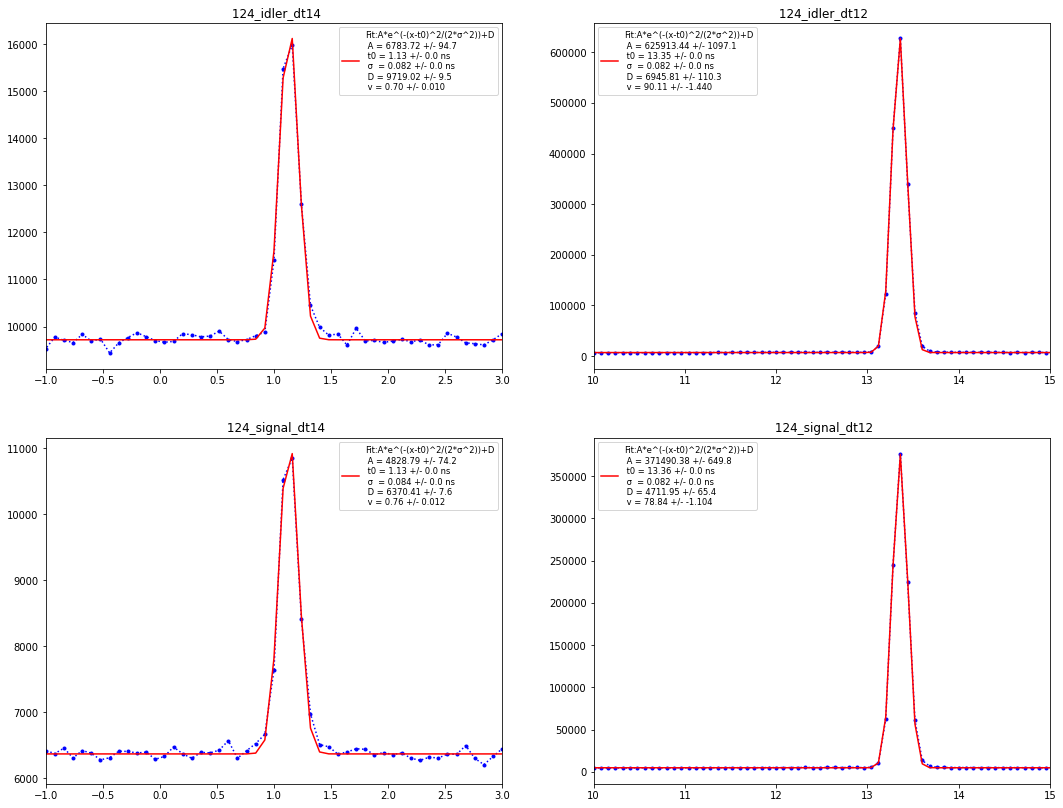

In [7]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (18,14))

nbins=125
x = np.linspace(8,18,nbins+1)
h12_from_triplets_idler=np.histogram(triplets_124_idler_dt12,bins=np.arange(8000, 18000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[0,1].set_title(' 124_idler_dt12')
best_vals, covar = curve_fit(gauss, x[:-1], h12_from_triplets_idler[0], p0 = [10000, 13, 0.08, 11000])
ax[0,1].plot(x[:-1], h12_from_triplets_idler[0], 'b.:')
ax[0,1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), abs(best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0,1].legend(fontsize = 'small',loc='best')
ax[0,1].set_xlim(10,15)
#ax.set_ylim(40000,60000)
globals()["t0_12_idler_124"] = ((best_vals[1]))
globals()["sigma_12_idler_124"] = abs((best_vals[2]))
globals()["v_12_idler_124"] = abs(best_vals[0]/best_vals[3])


w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h14_from_triplets_idler=np.histogram(triplets_124_idler_dt14,bins=np.arange(-5000, 5000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[0,0].set_title(' 124_idler_dt14')
best_vals, covar = curve_fit(gauss, x[:-1], h14_from_triplets_idler[0], p0 = [10000, 1, 0.08, 11000])
ax[0,0].plot(x[:-1], h14_from_triplets_idler[0], 'b.:')
ax[0,0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[0,0].legend(fontsize = 'small',loc='best')
ax[0,0].set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_14_idler_124"] = ((best_vals[1]))
globals()["sigma_14_idler_124"] = abs((best_vals[2]))
globals()["v_14_idler_124"] = abs(best_vals[0]/best_vals[3])

nbins=125
x = np.linspace(8,18,nbins+1)
h12_from_triplets_signal=np.histogram(triplets_124_signal_dt12,bins=np.arange(8000, 18000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[1,1].set_title(' 124_signal_dt12')
best_vals, covar = curve_fit(gauss, x[:-1], h12_from_triplets_signal[0], p0 = [10000, 13, 0.08, 11000])
ax[1,1].plot(x[:-1], h12_from_triplets_signal[0], 'b.:')
ax[1,1].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), abs(best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1,1].legend(fontsize = 'small',loc='best')
ax[1,1].set_xlim(10,15)
#ax.set_ylim(40000,60000)
globals()["t0_12_signal_124"] = ((best_vals[1]))
globals()["sigma_12_signal_124"] = abs((best_vals[2]))
globals()["v_12_signal_124"] = abs(best_vals[0]/best_vals[3])


w=80
nbins=125
x = np.linspace(-5,5,nbins+1)
h14_from_triplets_signal=np.histogram(triplets_124_signal_dt14,bins=np.arange(-5000, 5000 + w, w))

#fig, ax = plt.subplots(figsize = (6,3))
ax[1,0].set_title(' 124_signal_dt14')
best_vals, covar = curve_fit(gauss, x[:-1], h14_from_triplets_signal[0], p0 = [10000, 1, 0.08, 11000])
ax[1,0].plot(x[:-1], h14_from_triplets_signal[0], 'b.:')
ax[1,0].plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax[1,0].legend(fontsize = 'small',loc='best')
ax[1,0].set_xlim(-1,3)
#ax.set_ylim(40000,60000)
globals()["t0_14_signal_124"] = ((best_vals[1]))
globals()["sigma_14_signal_124"] = abs((best_vals[2]))
globals()["v_14_signal_124"] = abs(best_vals[0]/best_vals[3])



In [8]:
## 123

#signal





t0=globals()["t0_12_signal"]*1000
sigma=globals()["sigma_12_signal"]*1000
dt12_window_signal=np.logical_and(triplets_123_signal_dt12>t0-sigma*0.75,triplets_123_signal_dt12<t0+sigma*0.75)

t0=globals()["t0_13_signal"]*1000
sigma=globals()["sigma_13_signal"]*1000
dt13_window_signal=np.logical_and(triplets_123_signal_dt13>t0-sigma*0.75,triplets_123_signal_dt13<t0+sigma*0.75)


peaks_123_isolated_signal=np.logical_and(dt12_window_signal,dt13_window_signal)





#idler



t0=globals()["t0_12_idler"]*1000
sigma=globals()["sigma_12_idler"]*1000
dt12_window_idler=np.logical_and(triplets_123_idler_dt12>t0-sigma*0.75,triplets_123_idler_dt12<t0+sigma*0.75)


t0=globals()["t0_13_idler"]*1000
sigma=globals()["sigma_13_idler"]*1000
dt13_window_idler=np.logical_and(triplets_123_idler_dt13>t0-sigma*0.75,triplets_123_idler_dt13<t0+sigma*0.75)


peaks_123_isolated_idler=np.logical_and(dt12_window_idler,dt13_window_idler)



#124

#signal
t0=globals()["t0_12_signal_124"]*1000
sigma=globals()["sigma_12_signal_124"]*1000
dt12_window_signal=np.logical_and(triplets_124_signal_dt12>t0-sigma*0.75,triplets_124_signal_dt12<t0+sigma*0.75)

t0=globals()["t0_14_signal_124"]*1000
sigma=globals()["sigma_14_signal_124"]*1000
dt14_window_signal=np.logical_and(triplets_124_signal_dt14>t0-sigma*0.75,triplets_124_signal_dt14<t0+sigma*0.75)


peaks_124_isolated_signal=np.logical_and(dt12_window_signal,dt14_window_signal)


#idler
t0=globals()["t0_12_idler_124"]*1000
sigma=globals()["sigma_12_idler_124"]*1000
dt12_window_idler=np.logical_and(triplets_124_idler_dt12>t0-sigma*0.75,triplets_124_idler_dt12<t0+sigma*0.75)


t0=globals()["t0_14_idler_124"]*1000
sigma=globals()["sigma_14_idler_124"]*1000
dt14_window_idler=np.logical_and(triplets_124_idler_dt14>t0-sigma*0.75,triplets_124_idler_dt14<t0+sigma*0.75)

peaks_124_isolated_idler=np.logical_and(dt12_window_idler,dt14_window_idler)




isolated_triplets_123_idler=triplets_123_idler[peaks_123_isolated_idler]
isolated_triplets_123_signal=triplets_123_signal[peaks_123_isolated_signal]

isolated_triplets_124_idler=triplets_124_idler[peaks_124_isolated_idler]
isolated_triplets_124_signal=triplets_124_signal[peaks_124_isolated_signal]






Text(0, 0.5, 'Entries')

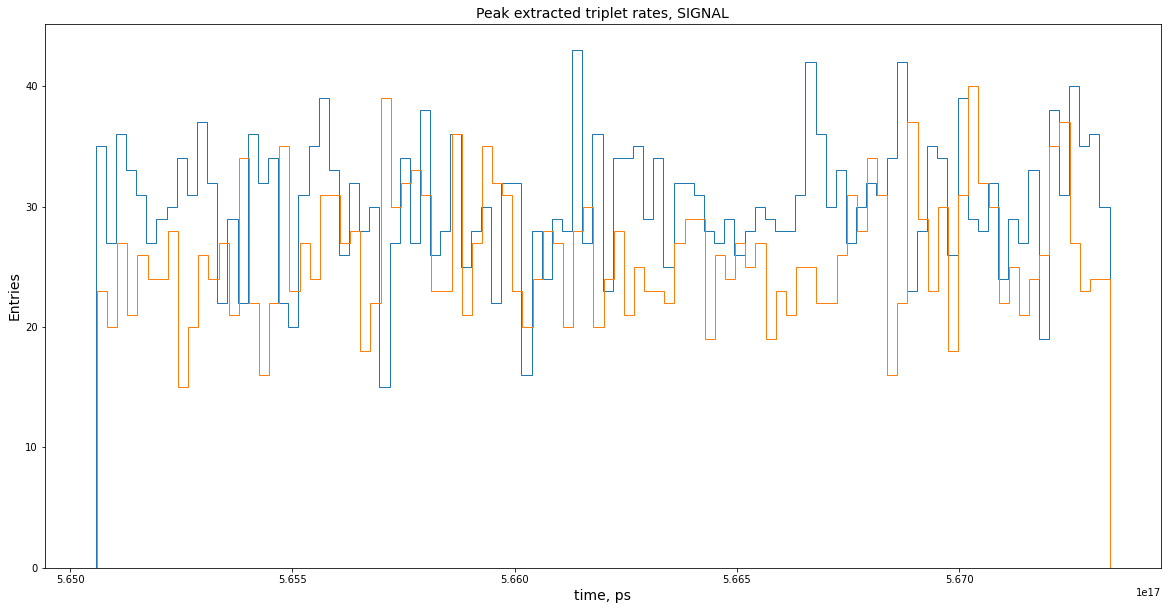

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.hist(isolated_triplets_123_signal[:,0],bins=100,histtype='step')
_=ax.hist(isolated_triplets_124_signal[:,0],bins=100,histtype='step')
ax.set_title("Peak extracted triplet rates, SIGNAL",fontsize=14)
ax.set_xlabel("time, ps",fontsize=14)
ax.set_ylabel("Entries",fontsize=14)

Text(0, 0.5, 'Entries')

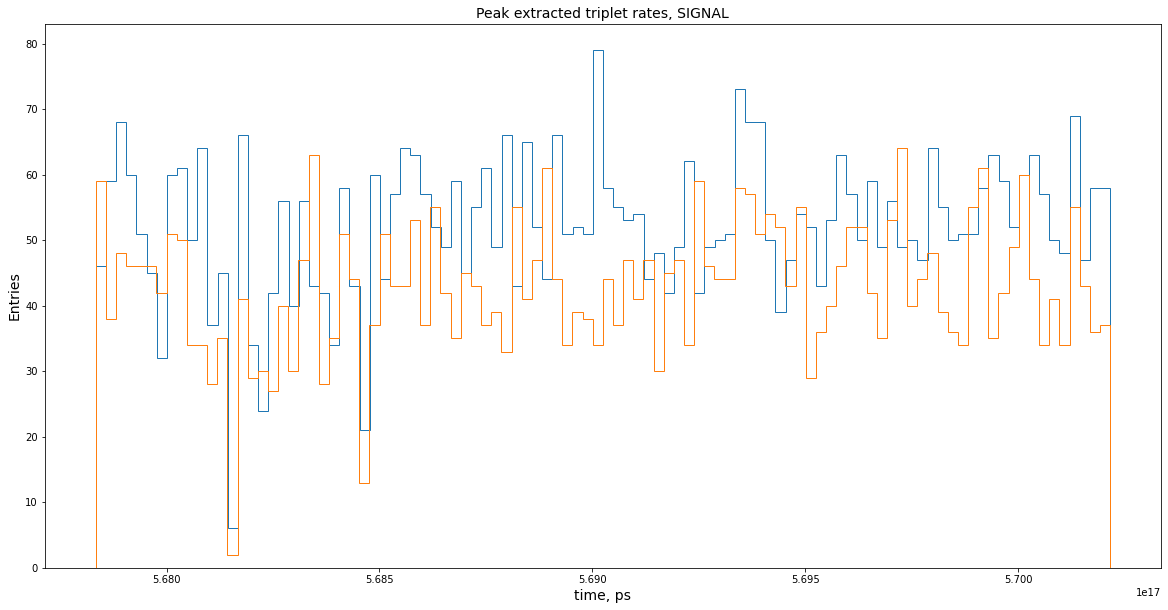

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.hist(isolated_triplets_123_idler[:,0],bins=100,histtype='step')
_=ax.hist(isolated_triplets_124_idler[:,0],bins=100,histtype='step')
ax.set_title("Peak extracted triplet rates, SIGNAL",fontsize=14)
ax.set_xlabel("time, ps",fontsize=14)
ax.set_ylabel("Entries",fontsize=14)

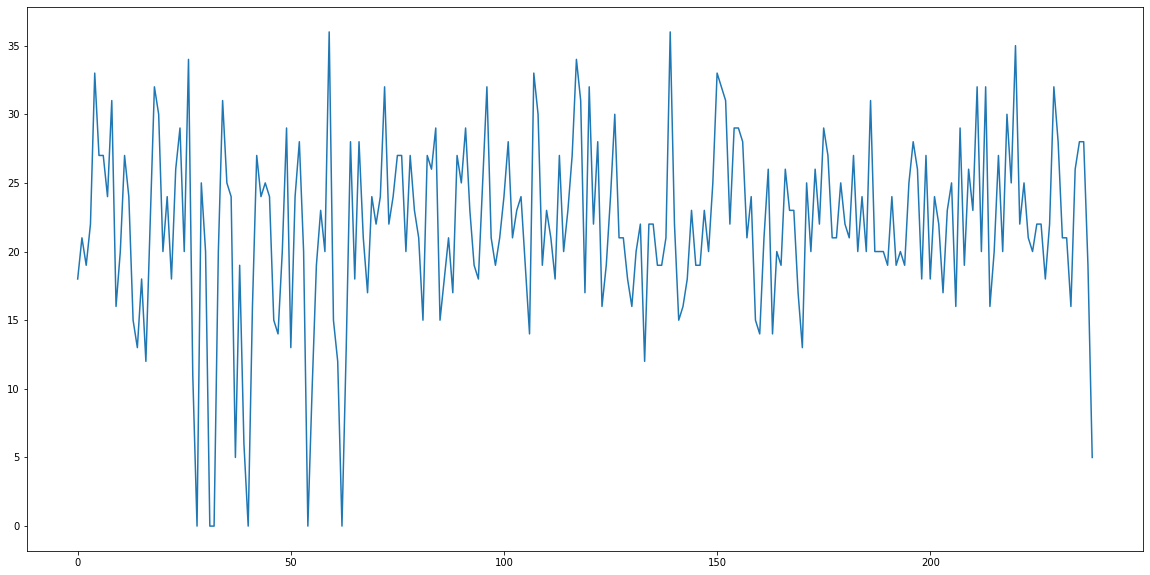

In [11]:

x = np.linspace(isolated_triplets_123_idler[0,0], isolated_triplets_123_idler[len(isolated_triplets_123_idler[:,0])-1,0],nbins+1)



fig, ax = plt.subplots(figsize = (20,10))
w=10e12



t_rates_123=np.histogram(isolated_triplets_123_idler[:,0],bins=np.arange(isolated_triplets_123_idler[0,0], isolated_triplets_123_idler[len(isolated_triplets_123_idler[:,0])-1,0] + w, w))


ax.plot(t_rates_123[0])

Text(0.5, 1.0, 'IDLER Triplet rates (30s bins)')

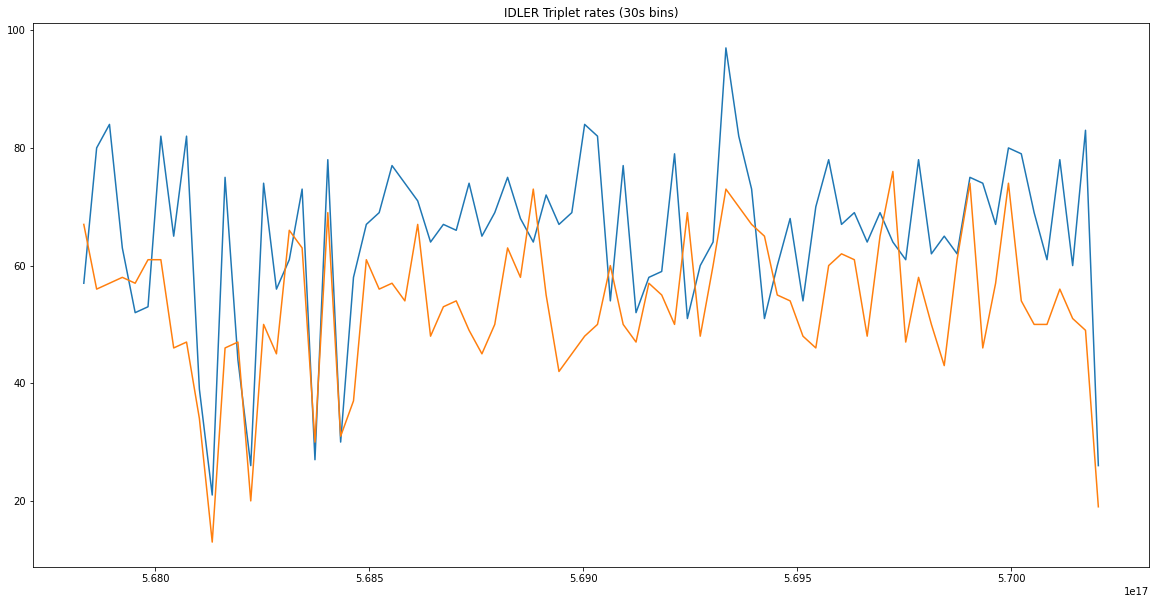

In [20]:
w=30e12
x = np.arange(min(isolated_triplets_123_idler[0,0],isolated_triplets_124_idler[0,0]), max(isolated_triplets_123_idler[-1,0],isolated_triplets_124_idler[-1,0])+w,w)
fig, ax = plt.subplots(figsize = (20,10))



t_rates_123=np.histogram(isolated_triplets_123_idler[:,0],bins=x)
t_rates_124=np.histogram(isolated_triplets_124_idler[:,0],bins=x)



_=ax.plot(x[:-1],t_rates_123[0])
_=ax.plot(x[:-1],t_rates_124[0])

plt.title("IDLER Triplet rates (30s bins)")

Text(0.5, 1.0, 'IDLER 123 vs 124 Bin correlations')

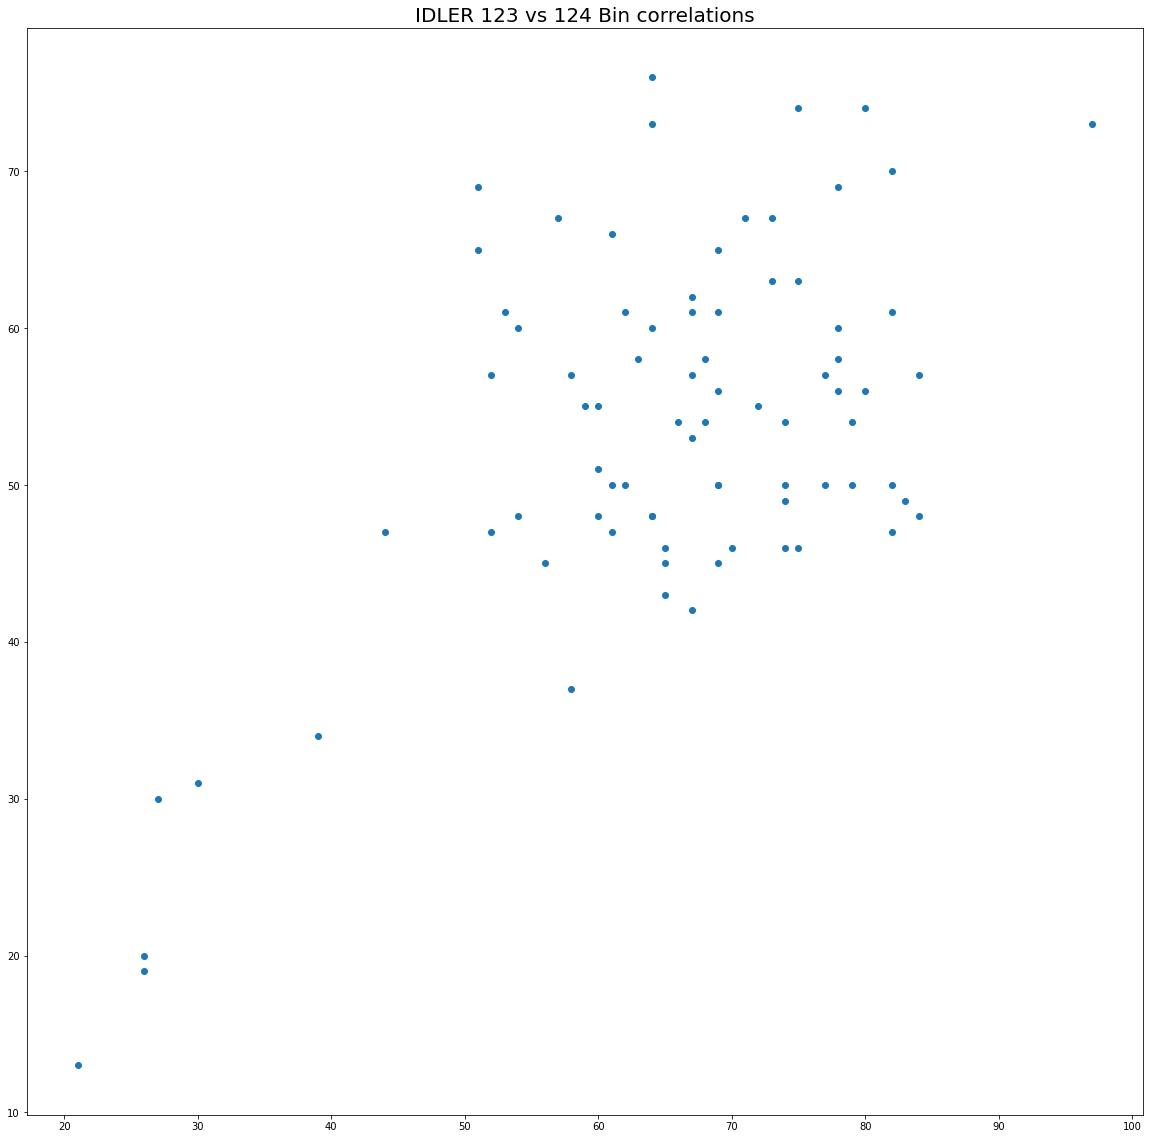

In [21]:
fig, ax = plt.subplots(figsize = (20,20))

_=ax.scatter(t_rates_123[0],t_rates_124[0])

plt.title("IDLER 123 vs 124 Bin correlations",fontsize=20)

Text(0.5, 1.0, 'IDLER 123 vs 124 Bin correlations')

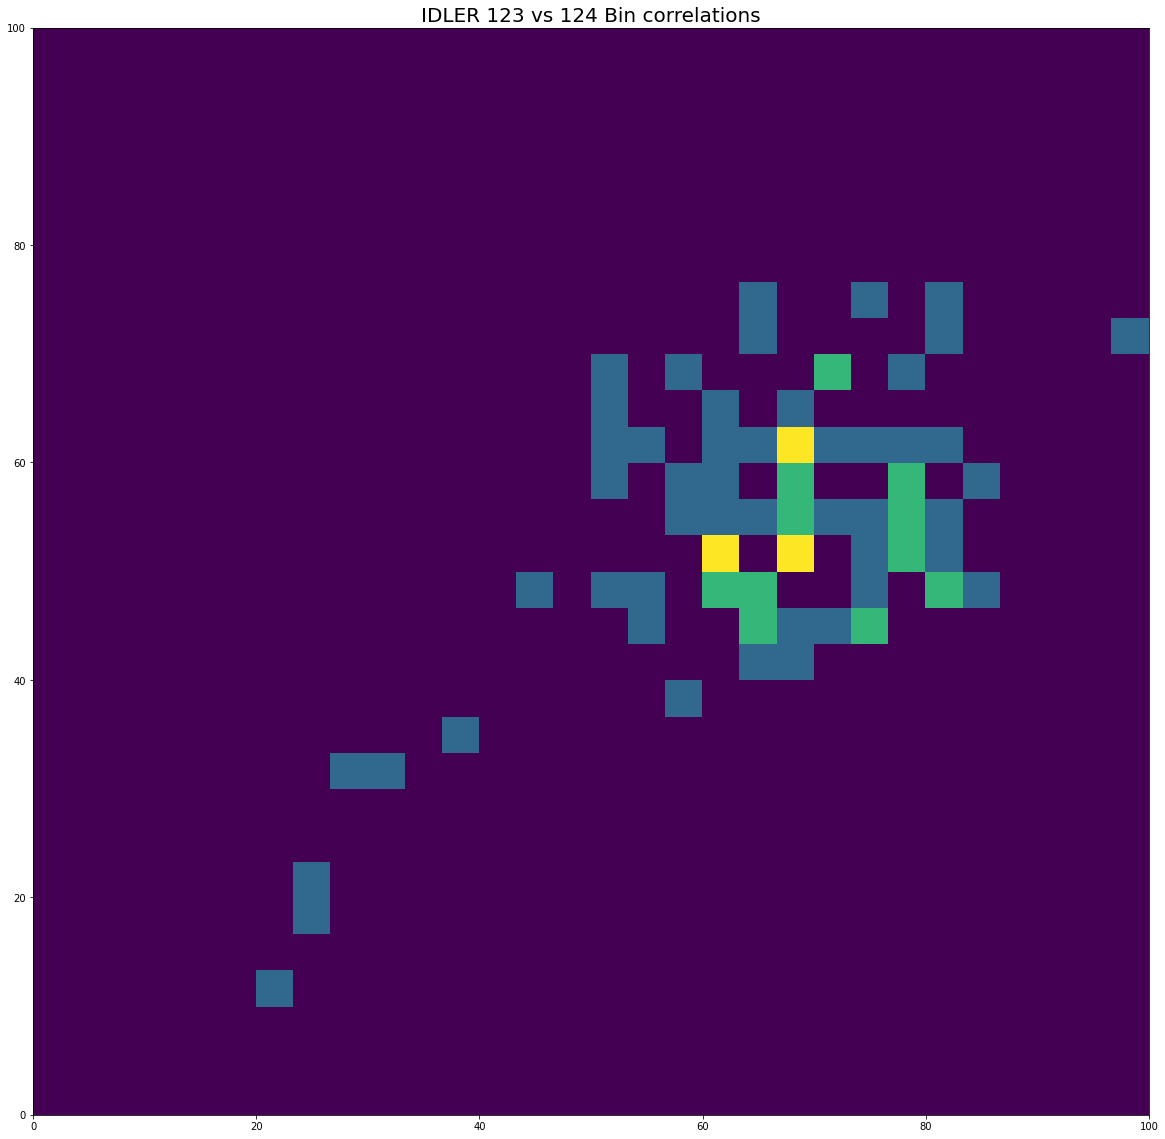

In [23]:
fig, ax = plt.subplots(figsize = (20,20))

_=ax.hist2d(t_rates_123[0],t_rates_124[0],bins=(30,30),range=((0,100),(0,100)))

plt.title("IDLER 123 vs 124 Bin correlations",fontsize=20)

Text(0.5, 1.0, 'SIGNAL Triplet rates (30s bins)')

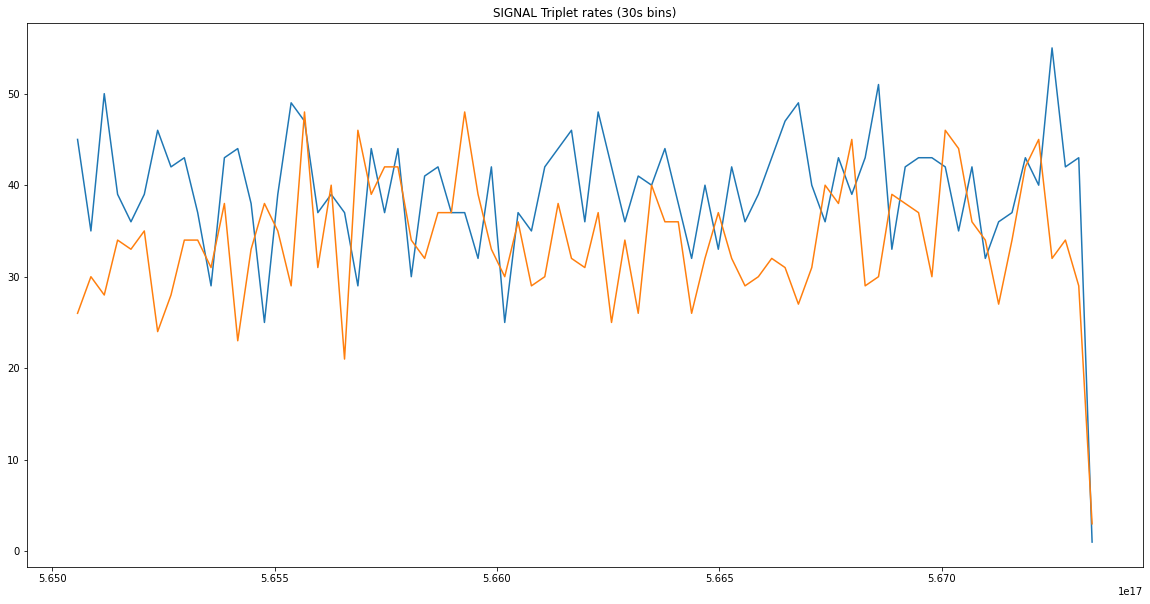

In [43]:
w=30e12
x = np.arange(min(isolated_triplets_123_signal[0,0],isolated_triplets_124_signal[0,0]), max(isolated_triplets_123_signal[-1,0],isolated_triplets_124_signal[-1,0])+w,w)
fig, ax = plt.subplots(figsize = (20,10))



t_rates_123=np.histogram(isolated_triplets_123_signal[:,0],bins=x)
t_rates_124=np.histogram(isolated_triplets_124_signal[:,0],bins=x)



_=ax.plot(x[:-1],t_rates_123[0])
_=ax.plot(x[:-1],t_rates_124[0])
plt.title("SIGNAL Triplet rates (30s bins)")

Text(0.5, 1.0, 'SIGNAL 123 vs 124 Bin correlations')

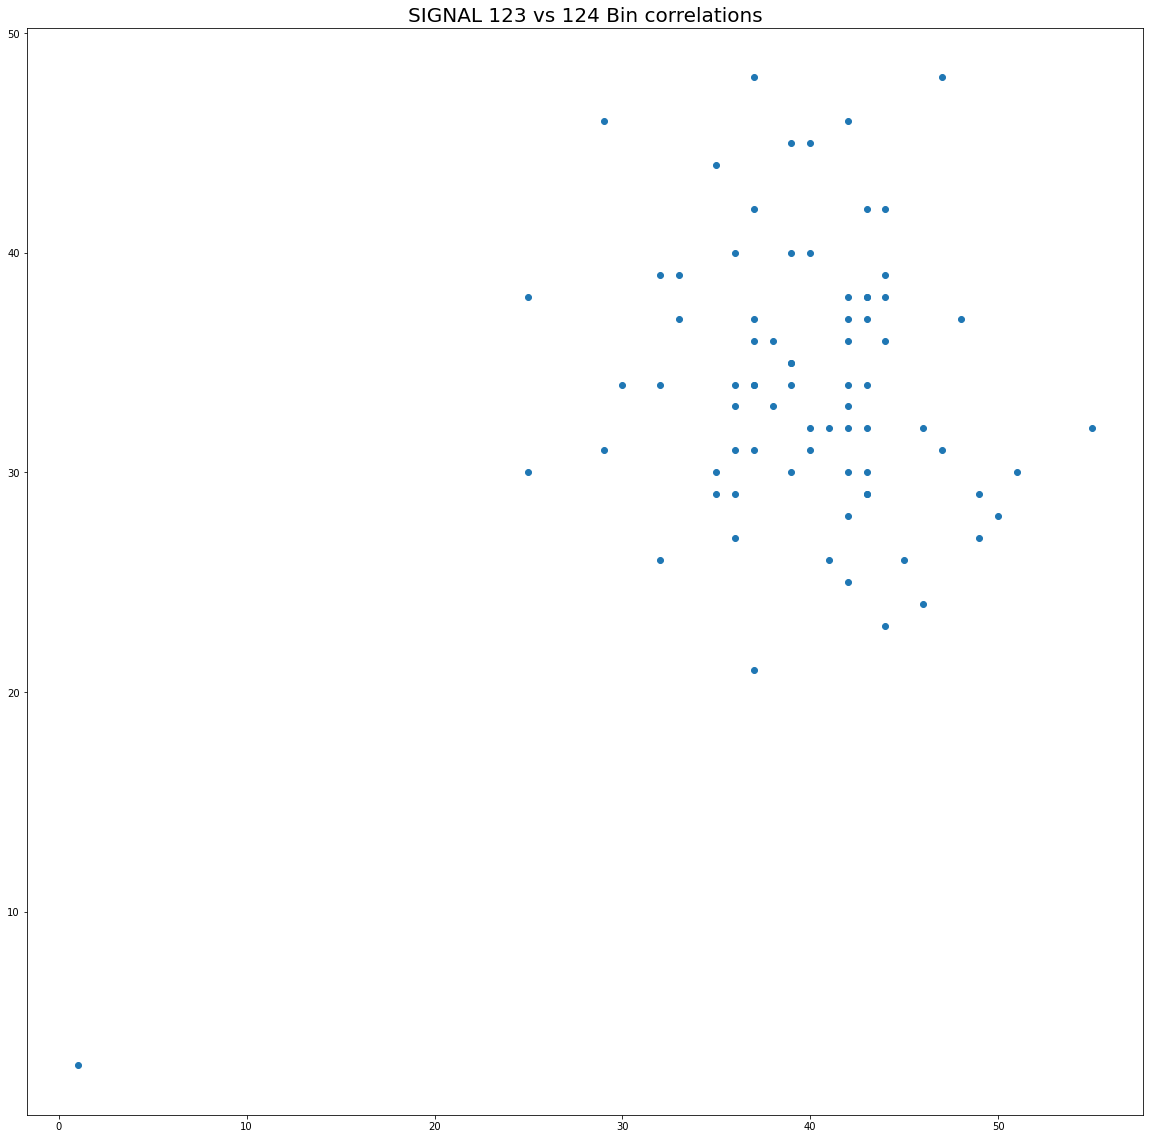

In [44]:
fig, ax = plt.subplots(figsize = (20,20))

_=ax.scatter(t_rates_123[0],t_rates_124[0])
plt.title("SIGNAL 123 vs 124 Bin correlations",fontsize=20)

Text(0.5, 1.0, 'SIGNAL 123 vs 124 Bin correlations')

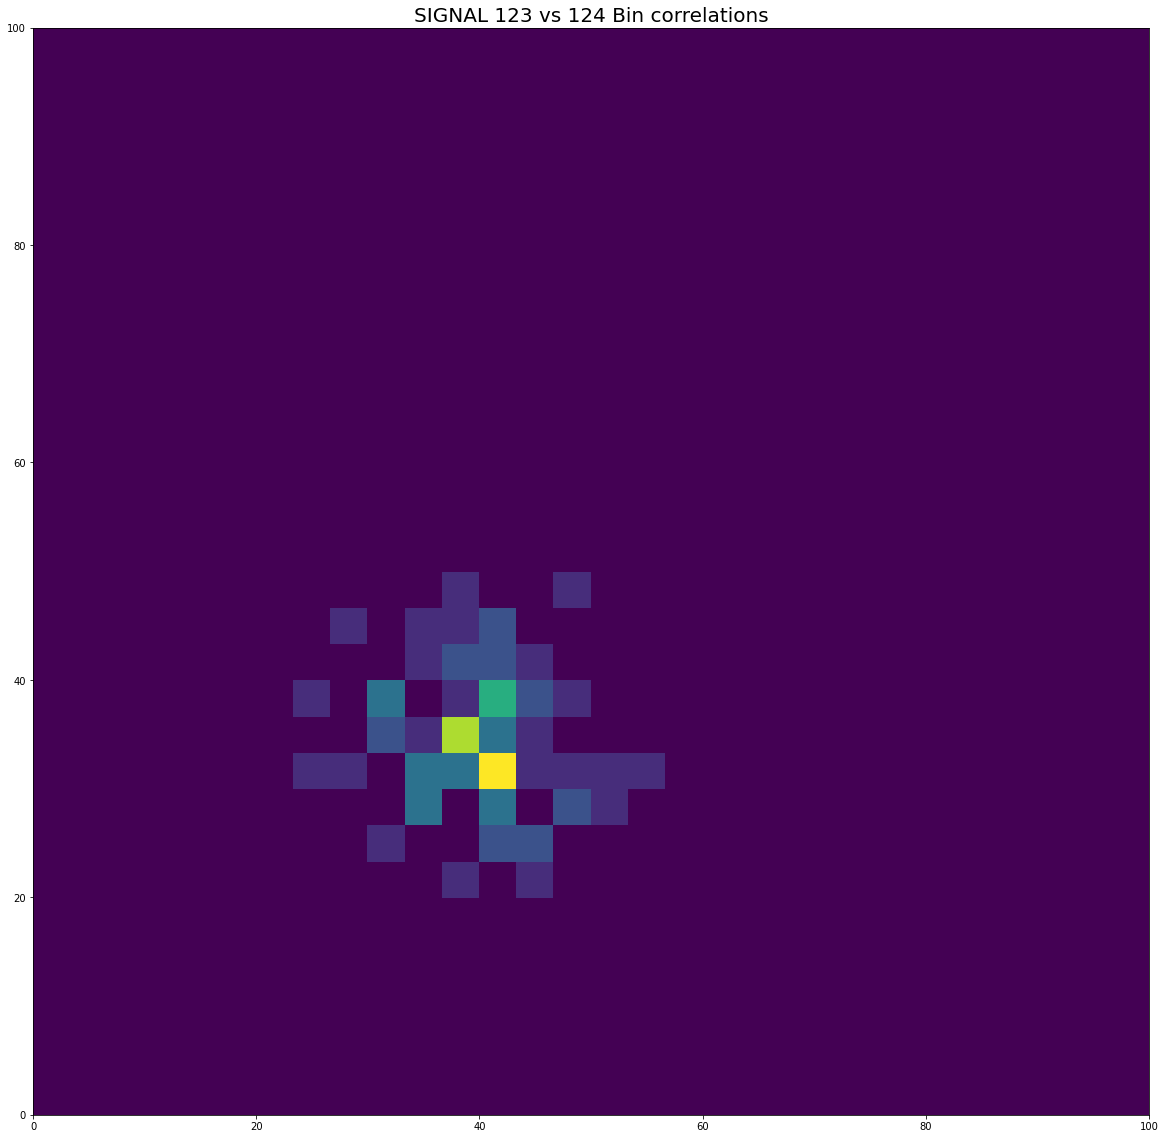

In [45]:
fig, ax = plt.subplots(figsize = (20,20))

_=ax.hist2d(t_rates_123[0][:-1],t_rates_124[0][:-1],bins=(30,30),range=((0,100),(0,100)))

plt.title("SIGNAL 123 vs 124 Bin correlations",fontsize=20)

In [27]:


time_window=isolated_triplets_123_idler[:,0]>5.685e17

isolated_triplets_123_idler_time_isolated=isolated_triplets_123_idler[time_window]


time_window=isolated_triplets_124_idler[:,0]>5.685e17

isolated_triplets_124_idler_time_isolated=isolated_triplets_124_idler[time_window]


Text(0.5, 1.0, 'IDLER Triplet rates (30s bins) AFTER THE DIP')

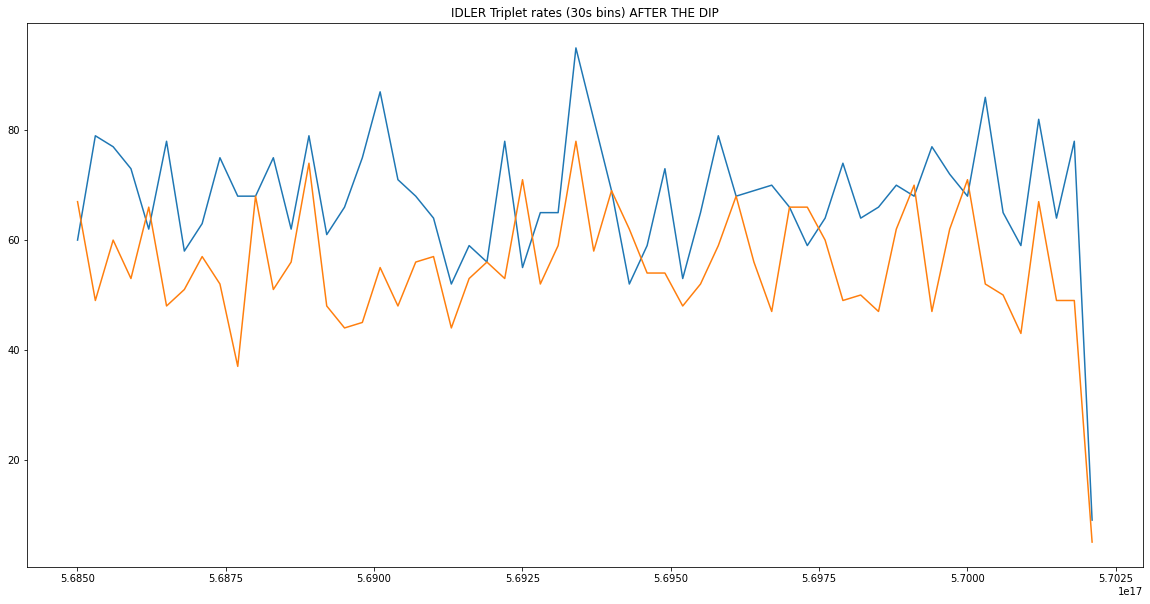

In [40]:
w=30e12
x = np.arange(min(isolated_triplets_123_idler_time_isolated[0,0],isolated_triplets_124_idler_time_isolated[0,0]), max(isolated_triplets_123_idler_time_isolated[-1,0],isolated_triplets_124_idler_time_isolated[-1,0])+w,w)
fig, ax = plt.subplots(figsize = (20,10))



t_rates_123=np.histogram(isolated_triplets_123_idler_time_isolated[:-1,0],bins=x)
t_rates_124=np.histogram(isolated_triplets_124_idler_time_isolated[:-1,0],bins=x)



_=ax.plot(x[:-1],t_rates_123[0])
_=ax.plot(x[:-1],t_rates_124[0])

plt.title("IDLER Triplet rates (30s bins) AFTER THE DIP")

Text(0.5, 1.0, 'IDLER 123 vs 124 Bin correlations')

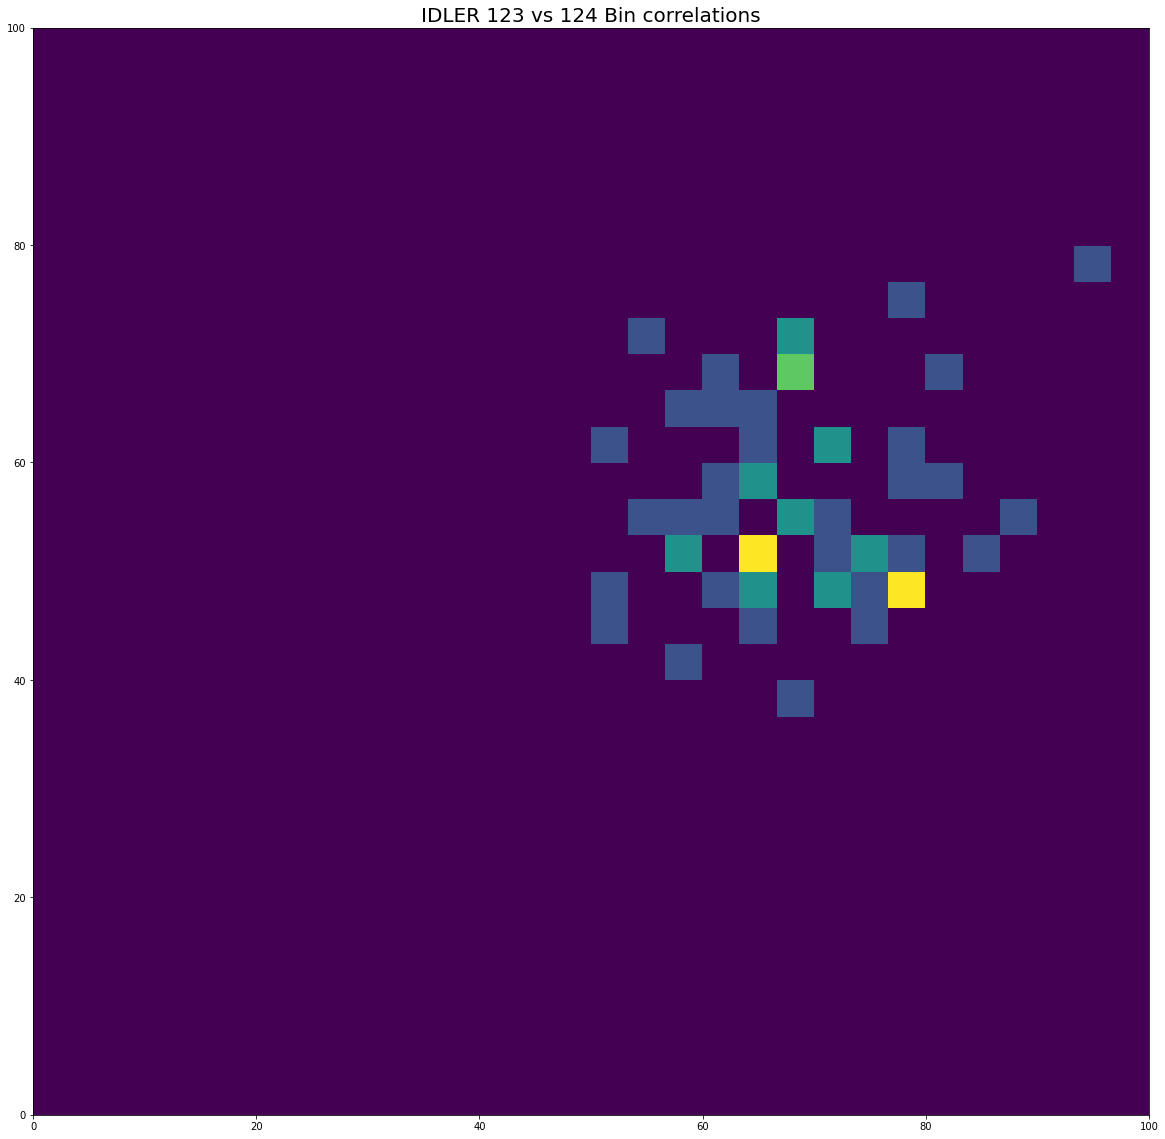

In [42]:
fig, ax = plt.subplots(figsize = (20,20))

_=ax.hist2d(t_rates_123[0][:-1],t_rates_124[0][:-1],bins=(30,30),range=((0,100),(0,100)))

plt.title("IDLER 123 vs 124 Bin correlations",fontsize=20)